# Basic visualizations for the KiltHub dataset

Data is available for download [here](https://kilthub.cmu.edu/articles/dataset/TrajAir_A_General_Aviation_Trajectory_Dataset/14866251).

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/7days1/raw_data/09-18-20_adsb/1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123157 entries, 0 to 123156
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        123157 non-null  int64  
 1   Time      123157 non-null  object 
 2   Date      123157 non-null  object 
 3   Altitude  123157 non-null  int64  
 4   Speed     122622 non-null  float64
 5   Heading   122622 non-null  float64
 6   Lat       123157 non-null  float64
 7   Lon       123157 non-null  float64
 8   Age       123157 non-null  float64
 9   Range     123157 non-null  float64
 10  Bearing   123157 non-null  float64
 11  Tail      122470 non-null  object 
 12  Metar     123157 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 12.2+ MB


In [5]:
print('Ignoring column `Metar` for display purposes')
df.head().drop(columns=['Metar'])

Ignoring column `Metar` for display purposes


,ID,Time,Date,Altitude,Speed,Heading,Lat,Lon,Age,Range,Bearing,Tail
0,10837576,06:56:37.639,09/18/2020,2400,NaN,NaN,40.756298,-80.180405,3.708842,19.611824,-96.946726,N445ME
1,10837576,06:56:41.293,09/18/2020,2400,NaN,NaN,40.756298,-80.180405,1.712816,19.611824,-96.946726,N445ME
2,10837576,06:56:43.753,09/18/2020,2400,NaN,NaN,40.753006,-80.178040,0.907223,19.462659,-98.087400,N445ME
3,10837576,06:56:45.438,09/18/2020,2400,NaN,NaN,40.753006,-80.178040,0.600241,19.462659,-98.087400,N445ME
4,10837576,06:56:45.438,09/18/2020,2400,NaN,NaN,40.753006,-80.178040,1.710377,19.462659,-98.087400,N445ME


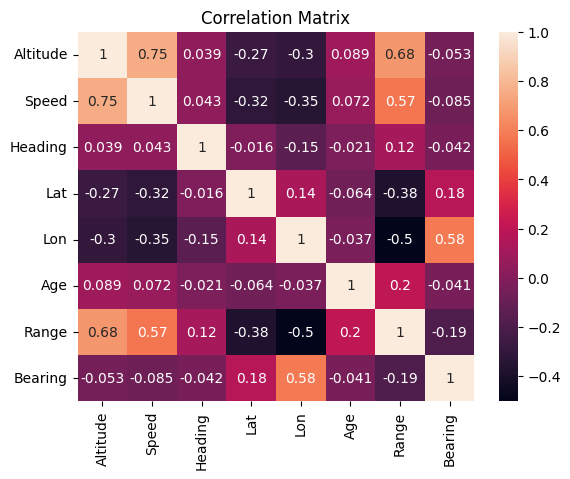

In [9]:

correlation_matrix = df[['Altitude', 'Speed', 'Heading', 'Lat', 'Lon', 'Age', 'Range', 'Bearing']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

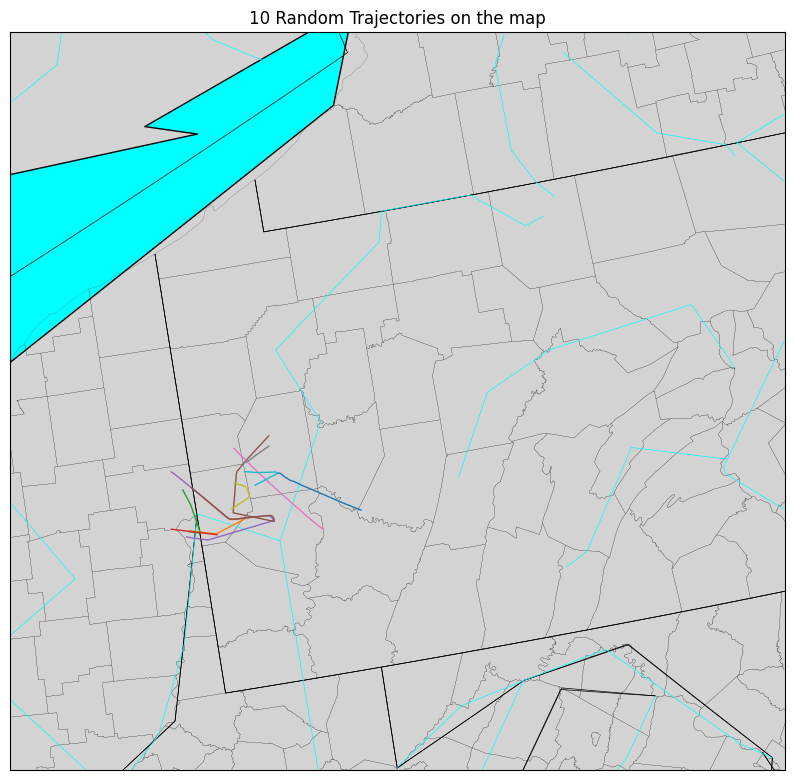

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Group the DataFrame by 'ID' to get individual trajectories
grouped = df.groupby('ID')

# Create a basemap of the United States
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(llcrnrlon=-82,llcrnrlat=39.5,urcrnrlon=-76,urcrnrlat=42.5,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawrivers(color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcounties()

# Randomly select 10 trajectories
random_ids = np.random.choice(df['ID'].unique(), 10)

# Plot each trajectory on the map
for id in random_ids:
    trajectory = grouped.get_group(id)
    x, y = m(trajectory['Lon'].values, trajectory['Lat'].values)
    m.plot(x, y, marker=None, linewidth=1)

plt.title('10 Random Trajectories on the map')
plt.show()

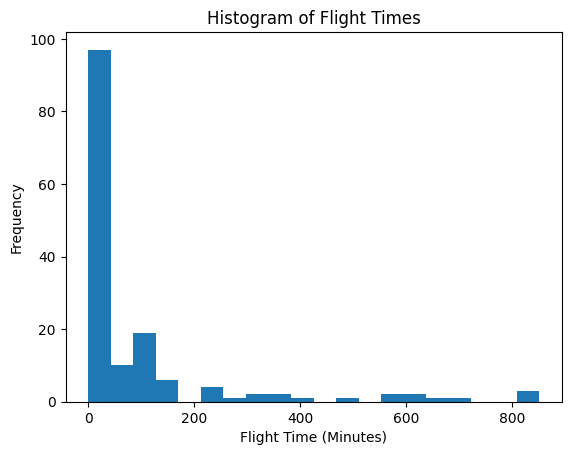

In [93]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


flight_times = df.groupby('ID')['timestamp'].apply(lambda x: x.max() - x.min())
flight_times_minutes = flight_times.dt.total_seconds() / 60

plt.hist(flight_times_minutes, bins=20)
plt.title('Histogram of Flight Times')
plt.xlabel('Flight Time (Minutes)')
plt.ylabel('Frequency')
plt.show()